<a href="https://colab.research.google.com/github/linhvuueh/-17-3---31241023210----VU-PHUONG-LINH/blob/main/BANKNOTES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir='/content/drive/MyDrive/NĂM NHẤT/AI/CNN/BANKNOTE'
img_width,img_height=128,128
batch_size=32

train_datagen=ImageDataGenerator(
    rescale=1.0/225,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(img_width,img_height,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(9,activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
epochs=26
history=model.fit(train_generator,epochs=epochs, validation_data=validation_generator)


Found 52 images belonging to 9 classes.
Found 8 images belonging to 9 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,801 (12.61 MB)

 Trainable params: 3,305,801 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/26
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.0974 - loss: 2.6132 - val_accuracy: 0.2500 - val_loss: 2.0888
Epoch 2/26
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 821ms/step - accuracy: 0.1651 - loss: 2.4000 - val_accuracy: 0.1250 - val_loss: 2.0706
Epoch 3/26
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 843ms/step - accuracy: 0.1418 - loss: 2.2079 - val_accuracy: 0.1250 - val_loss: 2.1720
Epoch 4/26
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 834ms/step - accuracy: 0.1779 - loss: 2.1765 - val_accuracy: 0.1250 - val_loss: 2.1553
Epoch 5/26
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.1269 - loss: 2.1581 - val_accuracy: 0.3750 - val_loss: 2.0633
Epoch 6/26
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.1192 - loss: 2.1336 - val_accuracy: 0.3750 - val_loss: 1.9560
Epoch 7/26
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 808ms/step - accuracy: 0.2941 - loss: 2.1198 - val_accuracy: 0.3750 - val_loss: 1.9478
Epoch 8/26
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.2500 - loss: 2.0199 - val_accuracy: 0.2500 - val_loss: 1.9508
Epoc

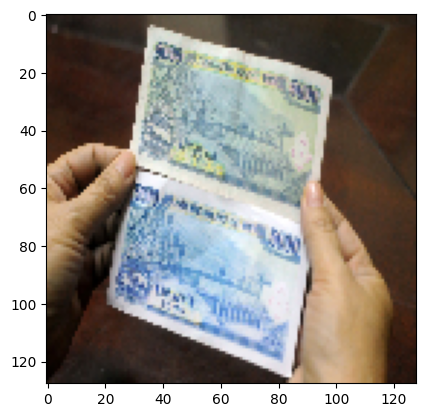

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Dự đoán: 5000


In [13]:
from keras.utils import load_img
import numpy as np
path ='/content/1423528249-tien_gia_3_tmpi.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()
img_array = np.array(img)
img_array = img_array.reshape((1, 128, 128, 3))
prediction = np.argmax(model.predict(img_array))
class_labels ={v:k for k,v in train_generator.class_indices.items()}
print(f"Dự đoán: {class_labels[prediction]}")

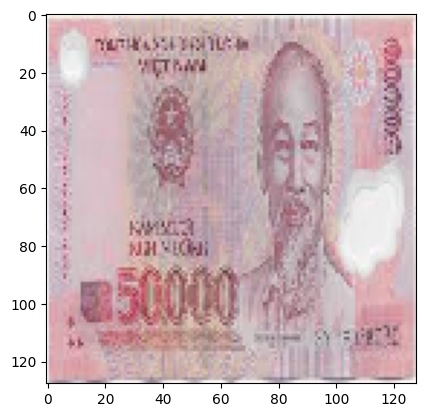

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Dự đoán: 50000


In [18]:
from keras.utils import load_img
import numpy as np
path ='/content/images.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()
img_array = np.array(img)
img_array = img_array.reshape((1, 128, 128, 3))
prediction = np.argmax(model.predict(img_array))
class_labels ={v:k for k,v in train_generator.class_indices.items()}
print(f"Dự đoán: {class_labels[prediction]}")

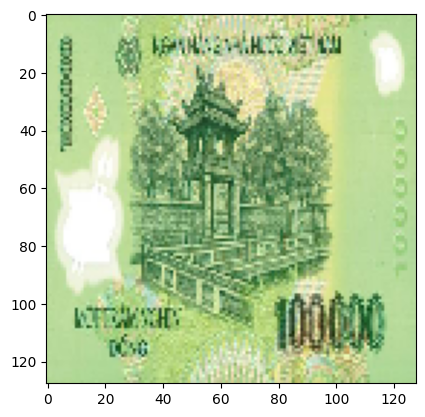

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Dự đoán: 100000


In [19]:
from keras.utils import load_img
import numpy as np
path ='/content/100nghins.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()
img_array = np.array(img)
img_array = img_array.reshape((1, 128, 128, 3))
prediction = np.argmax(model.predict(img_array))
class_labels ={v:k for k,v in train_generator.class_indices.items()}
print(f"Dự đoán: {class_labels[prediction]}")

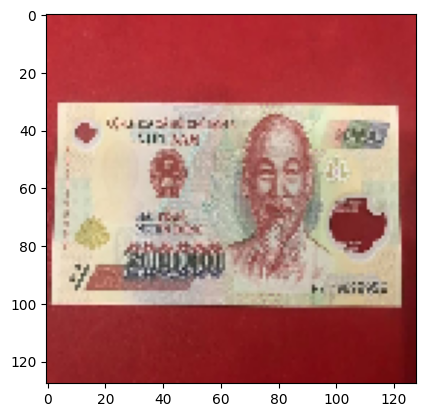

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Dự đoán: 200000


In [20]:
from keras.utils import load_img
import numpy as np
path ='/content/to200k-09283283.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()
img_array = np.array(img)
img_array = img_array.reshape((1, 128, 128, 3))
prediction = np.argmax(model.predict(img_array))
class_labels ={v:k for k,v in train_generator.class_indices.items()}
print(f"Dự đoán: {class_labels[prediction]}")

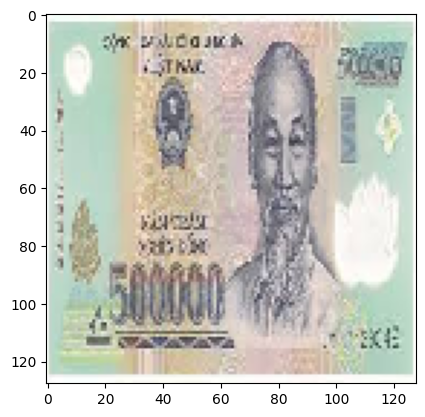

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Dự đoán: 500000


In [21]:
from keras.utils import load_img
import numpy as np
path ='/content/images.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()
img_array = np.array(img)
img_array = img_array.reshape((1, 128, 128, 3))
prediction = np.argmax(model.predict(img_array))
class_labels ={v:k for k,v in train_generator.class_indices.items()}
print(f"Dự đoán: {class_labels[prediction]}")